In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from model import Net
from utils import *

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cpu")

CUDA Available? False


In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

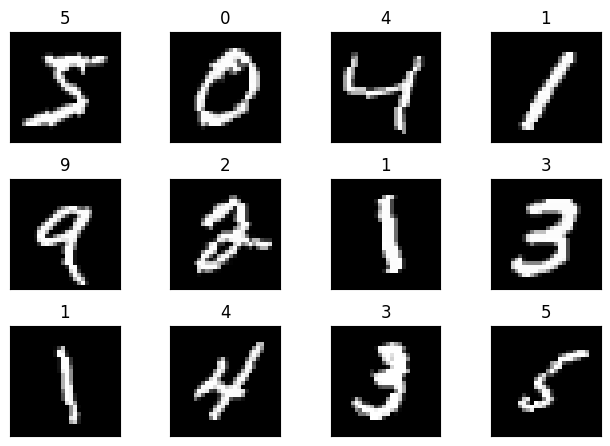

In [7]:
batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}


In [9]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion =  F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc,train_losses  =  train(model, device, train_loader, optimizer, criterion)
  test_acc,test_losses =  test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.5931 Batch_id=117 Accuracy=40.28: 100%|██████████| 118/118 [01:00<00:00,  1.94it/s]


Test set: Average loss: 0.3689, Accuracy: 8909/10000 (89.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.3315 Batch_id=117 Accuracy=92.25: 100%|██████████| 118/118 [00:58<00:00,  2.02it/s]


Test set: Average loss: 0.0993, Accuracy: 9692/10000 (96.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.2811 Batch_id=117 Accuracy=95.84: 100%|██████████| 118/118 [00:58<00:00,  2.03it/s]


Test set: Average loss: 0.0665, Accuracy: 9798/10000 (97.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.2817 Batch_id=117 Accuracy=96.91: 100%|██████████| 118/118 [00:58<00:00,  2.03it/s]


Test set: Average loss: 0.0605, Accuracy: 9800/10000 (98.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.2142 Batch_id=117 Accuracy=97.38: 100%|██████████| 118/118 [00:57<00:00,  2.05it/s]


Test set: Average loss: 0.0468, Accuracy: 9842/10000 (98.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1860 Batch_id=117 Accuracy=97.71: 100%|██████████| 118/118 [00:59<00:00,  1.97it/s]


Test set: Average loss: 0.0405, Accuracy: 9872/10000 (98.72%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.1594 Batch_id=117 Accuracy=97.92: 100%|██████████| 118/118 [00:58<00:00,  2.02it/s]


Test set: Average loss: 0.0395, Accuracy: 9878/10000 (98.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.1736 Batch_id=117 Accuracy=98.14: 100%|██████████| 118/118 [00:57<00:00,  2.05it/s]


Test set: Average loss: 0.0338, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.1601 Batch_id=117 Accuracy=98.31: 100%|██████████| 118/118 [00:57<00:00,  2.05it/s]


Test set: Average loss: 0.0307, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.1427 Batch_id=117 Accuracy=98.41: 100%|██████████| 118/118 [00:57<00:00,  2.06it/s]


Test set: Average loss: 0.0291, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.1507 Batch_id=117 Accuracy=98.51: 100%|██████████| 118/118 [00:57<00:00,  2.04it/s]


Test set: Average loss: 0.0269, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.1056 Batch_id=117 Accuracy=98.60: 100%|██████████| 118/118 [01:00<00:00,  1.95it/s]


Test set: Average loss: 0.0302, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.1232 Batch_id=117 Accuracy=98.57: 100%|██████████| 118/118 [00:57<00:00,  2.04it/s]


Test set: Average loss: 0.0300, Accuracy: 9897/10000 (98.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.1037 Batch_id=117 Accuracy=98.71: 100%|██████████| 118/118 [00:58<00:00,  2.03it/s]


Test set: Average loss: 0.0273, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0868 Batch_id=117 Accuracy=98.84: 100%|██████████| 118/118 [00:57<00:00,  2.04it/s]


Test set: Average loss: 0.0298, Accuracy: 9903/10000 (99.03%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0746 Batch_id=117 Accuracy=99.04: 100%|██████████| 118/118 [00:57<00:00,  2.04it/s]


Test set: Average loss: 0.0202, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0662 Batch_id=117 Accuracy=99.09: 100%|██████████| 118/118 [00:58<00:00,  2.01it/s]


Test set: Average loss: 0.0197, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0367 Batch_id=117 Accuracy=99.09: 100%|██████████| 118/118 [00:58<00:00,  2.02it/s]


Test set: Average loss: 0.0197, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0583 Batch_id=117 Accuracy=99.09: 100%|██████████| 118/118 [00:57<00:00,  2.04it/s]


Test set: Average loss: 0.0198, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0573 Batch_id=117 Accuracy=99.12: 100%|██████████| 118/118 [00:58<00:00,  2.01it/s]


Test set: Average loss: 0.0194, Accuracy: 9936/10000 (99.36%)

Adjusting learning rate of group 0 to 1.0000e-03.


Text(0.5, 1.0, 'Test Accuracy')

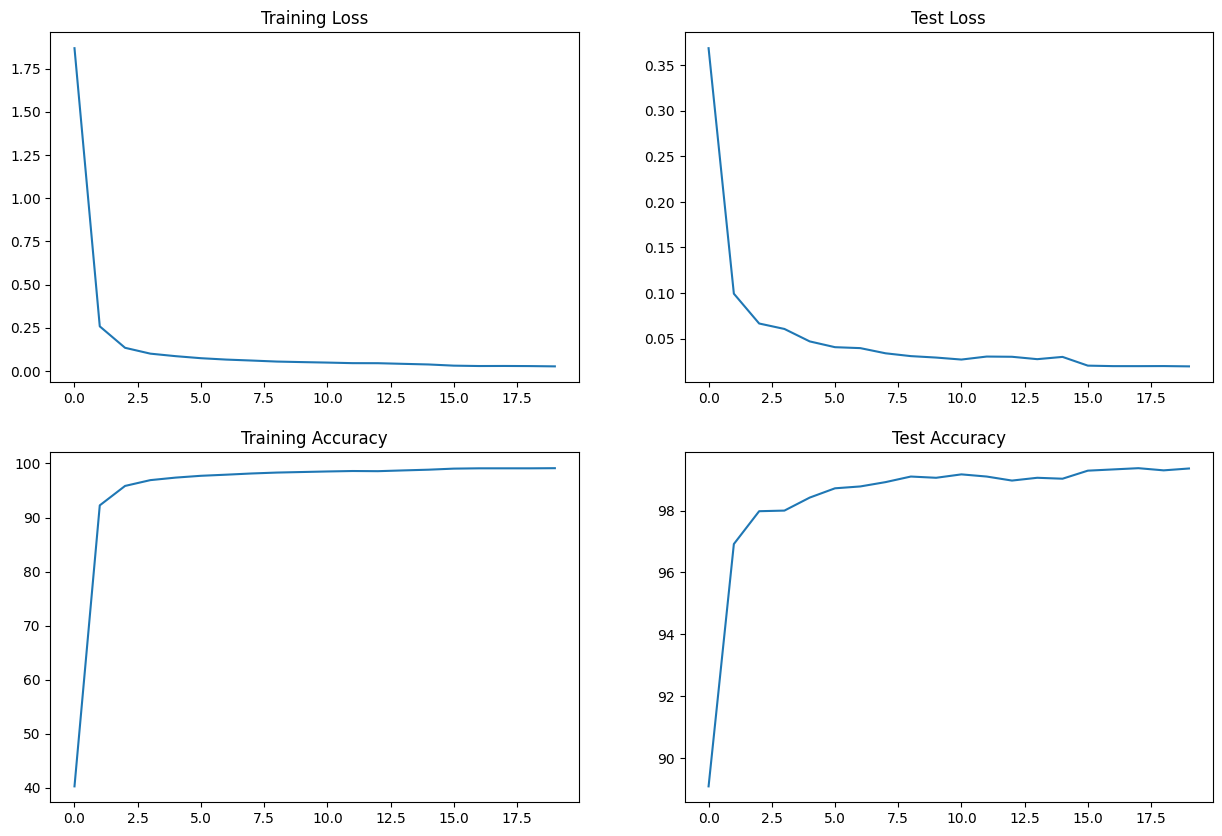

In [10]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")